In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df1=pd.read_csv('Data/train1.csv')
df2=pd.read_csv('Data/test_data1.csv')

df1['mean_gap']=pd.Series(np.random.randn(len(df1)),index=df1.index)
df2['mean_gap']=pd.Series(np.random.randn(len(df2)),index=df2.index)
df1['mean_order']=pd.Series(np.random.randn(len(df1)),index=df1.index)
df2['mean_order']=pd.Series(np.random.randn(len(df2)),index=df2.index)


for i in range(1,67):
    for j in range(1,145):
        
        df1_gap=np.array(df1[(df1.region_id==i)&(df1.slot==j)].gap)
        df1_order=np.array(df1[(df1.region_id==i)&(df1.slot==j)].order)
        df2_order=np.array(df2[(df2.region_id==i)&(df2.slot==j)].order)
        
        if df1_gap.shape[0]!=0 or df1_order.shape[0]!=0:
            med1=np.mean(df1_gap)
            mean=np.mean(df1_order)
            mean1=np.mean(df2_order)
            
            df1[(df1.region_id==i)&(df1.slot==j)].median=med1
            df2[(df2.region_id==i)&(df2.slot==j)].median=med1
            df1[(df1.region_id==i)&(df1.slot==j)].mean=mean
            df2[(df2.region_id==i)&(df2.slot==j)].mean=mean1
        else:
            df1[(df1.region_id==i)&(df1.slot==j)].median=0
            df2[(df2.region_id==i)&(df2.slot==j)].median=0
            df1[(df1.region_id==i)&(df1.slot==j)].mean=0
            df2[(df2.region_id==i)&(df2.slot==j)].mean=0
            

In [4]:
df1.describe()

region_id           slot            gap          order  \
count  199584.00000  199584.000000  199584.000000  199584.000000   
mean       33.50000      72.500000       7.598104      42.792078   
std        19.05042      41.568321      45.229539     103.652317   
min         1.00000       1.000000       0.000000       0.000000   
25%        17.00000      36.750000       0.000000       1.000000   
50%        33.50000      72.500000       1.000000       7.000000   
75%        50.00000     108.250000       3.000000      32.000000   
max        66.00000     144.000000    3872.000000    4362.000000   

              sumgap        WeekDay        Weather           Temp  \
count  199584.000000  199584.000000  199584.000000  199584.000000   
mean     1094.126984       3.000000       2.502024       5.367329   
std      3100.716422       2.000005       1.882603       3.955454   
min         8.000000       0.000000       0.000000       0.000000   
25%        73.000000       1.000000       2.000000       1.000000   
50%       155.000000       3.000000       2.000000       5.000000   
75%       697.000000       5.000000       4.000000       8.000000   
max     58704.000000       6.000000       9.000000      19.000000   

                PM25       POI_Sum       mean_gap     mean_order  
count  199584.000000  1.995840e+05  199584.000000  199584.000000  
mean       97.471065  2.964874e+05      -0.000024       0.000801  
std        64.411942  5.219022e+05       0.999941       0.999476  
min         6.000000  2.988000e+03      -4.531663      -4.449815  
25%        49.000000  5.079600e+04      -0.676815      -0.671041  
50%        98.000000  1.011770e+05       0.000231       0.000369  
75%       143.000000  2.546440e+05       0.674972       0.673211  
max       276.000000  3.340833e+06       4.269741       4.136390

In [5]:
df2.describe()

region_id          slot         order       WeekDay       Weather  \
count  47520.000000  47520.000000  47520.000000  47520.000000  47520.000000   
mean      33.500000     72.500000     11.681881      3.400000      2.993056   
std       19.050572     41.568654     64.389835      2.154089      1.450573   
min        1.000000      1.000000      0.000000      0.000000      1.000000   
25%       17.000000     36.750000      0.000000      2.000000      2.000000   
50%       33.500000     72.500000      0.000000      4.000000      3.000000   
75%       50.000000    108.250000      0.000000      5.000000      4.000000   
max       66.000000    144.000000   1876.000000      6.000000      8.000000   

        Temperature          pm25           POI      mean_gap    mean_order  
count  47520.000000  47520.000000  4.752000e+04  47520.000000  47520.000000  
mean       1.647222     65.754167  2.964874e+05      0.002068     -0.002002  
std        3.358357     24.045624  5.219064e+05      1.001552      1.007624  
min       -6.000000     29.000000  2.988000e+03     -4.343656     -4.237116  
25%        1.000000     46.000000  5.079600e+04     -0.675090     -0.683475  
50%        2.000000     69.000000  1.011770e+05      0.009497      0.000784  
75%        4.000000     82.000000  2.546440e+05      0.671622      0.675325  
max        6.000000    117.000000  3.340833e+06      4.019810      3.922980

In [6]:
df1.columns

Index([u'region_id', u'slot', u'gap', u'order', u'sumgap', u'WeekDay',
       u'Weather', u'Temp', u'PM25', u'POI_Sum', u'mean_gap', u'mean_order'],
      dtype='object')

In [7]:
df2.columns

Index([u'region_id', u'slot', u'order', u'WeekDay', u'Weather', u'Temperature',
       u'pm25', u'POI', u'mean_gap', u'mean_order'],
      dtype='object')

In [8]:
plt.scatter(df1.order,df1.gap)

In [9]:
plt.scatter(df1.region_id,df1.order)

In [10]:
plt.scatter(df1.slot,df1.order)

In [11]:
df1=df1[df1.gap<1500]

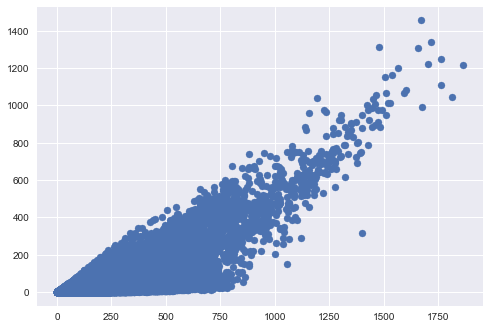

In [12]:
plt.scatter(df1.order,df1.gap)

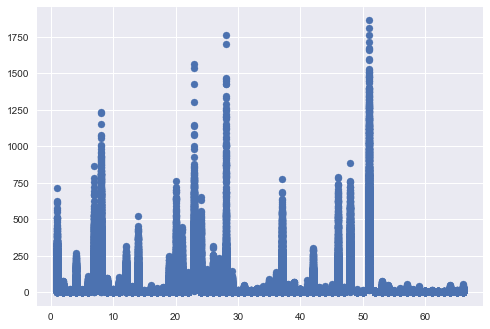

In [13]:
plt.scatter(df1.region_id,df1.order)

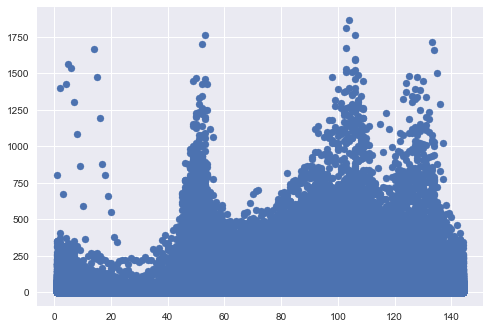

In [14]:
plt.scatter(df1.slot,df1.order)

In [15]:
df1[(df1.slot>=0)&(df1.slot<=25)&(df1.order>500)]=df1.order.median()

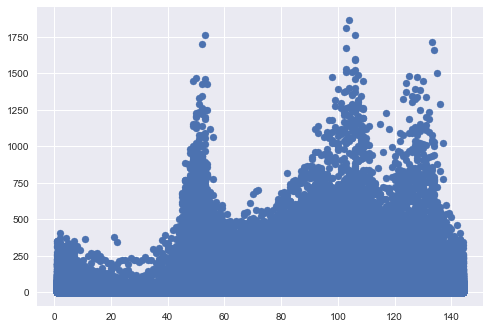

In [16]:
plt.scatter(df1.slot,df1.order)

In [17]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from collections import defaultdict

In [18]:
od=np.array(df1)
feat=[0,1,3,5,6,7,8,9,10,11]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [19]:
params = {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 10,
      'learning_rate': 0.01, 'loss': 'ls'}
#loss=
clf = ensemble.GradientBoostingRegressor(**params)

#clf.fit(X_train, y_train)
clf.fit(od[:,feat], od[:,2])

print mean_absolute_error(y_train, clf.predict(X_train))
mae = mean_absolute_error(y_test, clf.predict(X_test))
print("MAE: %.6f" % mae)
    

2.16030839208
MAE: 1.290604


In [20]:
d=np.array(df2)
feat=[0,1,2,3,4,5,6,7,8,9]
#feat=[0,1,3,5]

test_gap=od[:,feat]


In [21]:
print  clf.predict(test_gap)

[ 6.46490041  5.42825875  3.105402   ...,  0.36218231  0.78567046
  0.39288324]


In [22]:
z=clf.predict(test_gap)
gap_sum=np.sum(z)
gap_sum

702545.3592513469

In [23]:
gap_array_size=np.size(z)
gap_array_size

199573

In [24]:
average_gap=gap_sum/gap_array_size
average_gap

3.5202425140241762

In [30]:
df2.describe()

region_id          slot         order       WeekDay       Weather  \
count  47520.000000  47520.000000  47520.000000  47520.000000  47520.000000   
mean      33.500000     72.500000     11.681881      3.400000      2.993056   
std       19.050572     41.568654     64.389835      2.154089      1.450573   
min        1.000000      1.000000      0.000000      0.000000      1.000000   
25%       17.000000     36.750000      0.000000      2.000000      2.000000   
50%       33.500000     72.500000      0.000000      4.000000      3.000000   
75%       50.000000    108.250000      0.000000      5.000000      4.000000   
max       66.000000    144.000000   1876.000000      6.000000      8.000000   

        Temperature          pm25           POI      mean_gap    mean_order  
count  47520.000000  47520.000000  4.752000e+04  47520.000000  47520.000000  
mean       1.647222     65.754167  2.964874e+05      0.002068     -0.002002  
std        3.358357     24.045624  5.219064e+05      1.001552      1.007624  
min       -6.000000     29.000000  2.988000e+03     -4.343656     -4.237116  
25%        1.000000     46.000000  5.079600e+04     -0.675090     -0.683475  
50%        2.000000     69.000000  1.011770e+05      0.009497      0.000784  
75%        4.000000     82.000000  2.546440e+05      0.671622      0.675325  
max        6.000000    117.000000  3.340833e+06      4.019810      3.922980

In [31]:
unique_regions=df1.region_id.unique().astype(int64)
print unique_regions
print type(unique_regions[0])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
<type 'numpy.int64'>


In [32]:
region_wise=[0]*66
for i in range(unique_regions.shape[0]):
    region_wise[i]=df1[df1.region_id==unique_regions[i]]

In [33]:
region_wise[0].head()

region_id  slot   gap  order  sumgap  WeekDay  Weather  Temp   PM25  \
0        1.0   1.0   9.0  187.0  2372.0      4.0      1.0   3.0  177.0   
1        1.0   2.0   7.0  198.0  2372.0      4.0      1.0   3.0  177.0   
2        1.0   3.0  10.0  192.0  2372.0      4.0      1.0   3.0  177.0   
3        1.0   4.0   5.0  172.0  2372.0      4.0      1.0   3.0  177.0   
4        1.0   5.0   1.0  153.0  2372.0      4.0      1.0   3.0  177.0   

    POI_Sum  mean_gap  mean_order  
0  653376.0 -0.261787   -0.722155  
1  653376.0  0.102250    0.569699  
2  653376.0 -0.705662   -0.432166  
3  653376.0 -0.166340    3.266025  
4  653376.0 -0.718916   -0.049735

At i =  0 MAE at Train: 1.129764 Gap : 8.850940
At i =  1 MAE at Train: 0.284718 Gap : 0.038905
At i =  2 MAE at Train: 0.145505 Gap : 1.884635
At i =  3 MAE at Train: 0.612061 Gap : 2.427805
At i =  4 MAE at Train: 0.117791 Gap : -0.013605
At i =  5 MAE at Train: 0.352051 Gap : 0.666783
At i =  6 MAE at Train: 1.595410 Gap : 138.380728
At i =  7 MAE at Train: 1.611516 Gap : 14.084592
At i =  8 MAE at Train: 0.445457 Gap : 0.848642
At i =  9 MAE at Train: 0.152263 Gap : 0.014239
At i =  10 MAE at Train: 0.391428 Gap : 1.817157
At i =  11 MAE at Train: 0.888502 Gap : 3.235147
At i =  12 MAE at Train: 0.265816 Gap : 0.006739
At i =  13 MAE at Train: 0.922424 Gap : 6.217339
At i =  14 MAE at Train: 0.031657 Gap : -0.000599
At i =  15 MAE at Train: 0.258303 Gap : -0.020993
At i =  16 MAE at Train: 0.115181 Gap : 0.084621
At i =  17 MAE at Train: 0.246853 Gap : 0.393708
At i =  18 MAE at Train: 0.691770 Gap : 16.064557
At i =  19 MAE at Train: 0.858125 Gap : -0.000475
At i =  20 MAE at Trai

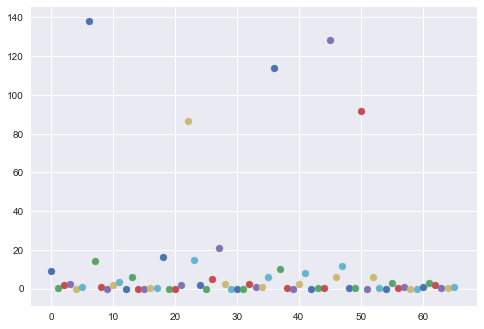

In [34]:
clf=[0]*66
feat=[1,3,4,5,6,7,8,9]
params = {'n_estimators': 1000, 'max_depth': 10,'min_samples_split': 10,
      'learning_rate': 0.01, 'loss': 'ls'}

error2=0
for i in range(66):
    clf[i] = ensemble.GradientBoostingRegressor(**params)
    
  
    train=np.array(region_wise[i][:])
 
    
    clf[i].fit(train[:,feat], train[:,2])
    
    mae2 = mean_absolute_error(train[:,2], clf[i].predict(train[:,feat]))
    a=clf[i].predict(train[:,feat])
    error2+=mae2
    print 'At i = ', i , ("MAE at Train: %.6f" % mae2),("Gap : %.6f" % a[i])
    plt.scatter(i,a[i])